In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf

import sys
sys.path.insert(0, "/home/lars/libraries/keras/")
from keras.preprocessing.image import *

Using TensorFlow backend.


In [2]:
random_rotation_with_boxes

<function keras.preprocessing.image.random_rotation_with_boxes>

In [5]:
sess = tf.Session()

In [6]:
img = np.zeros((1, 1000,1000,3))
img[:, 400:600, 400:600, :]=1

img[:, 300:400, 100:200, :]=1

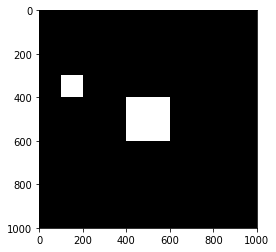

In [7]:
plt.imshow(img[0])
plt.show()

In [8]:
boxes = np.array([[0.4, 0.4, 0.6, 0.6],
                 [0.3, 0.1, 0.4, 0.2]])
boxes = np.expand_dims(boxes, 0)
boxes.shape

(1, 2, 4)

In [9]:
boxed_img = tf.image.draw_bounding_boxes(img, boxes)
boxed_img = sess.run(boxed_img)

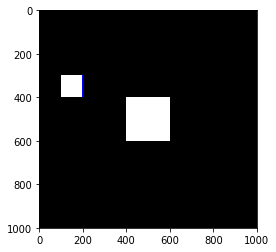

In [10]:
plt.imshow(boxed_img[0,:,:])

In [11]:
img.shape

(1, 1000, 1000, 3)

In [51]:
new_img, new_boxes = random_rotation_with_boxes(img[0], 100, boxes[0], row_axis=0, col_axis=1, channel_axis=2)

In [52]:
draw_img = new_img.copy()
for box in new_boxes:
    x_min, y_min, x_max, y_max = box
    dim_x, dim_y = draw_img.shape[:2]
    x_min = int(x_min * dim_x)
    x_max = int(x_max * dim_x)
    y_min = int(y_min * dim_y)
    y_max = int(y_max * dim_y)
    
    draw_img[x_min:x_min+5, y_min:y_max]=[1,0,0]
    draw_img[x_max-5:x_max, y_min:y_max]=[1,0,0]
    draw_img[x_min:x_max, y_min:y_min+5]=[1,0,0]
    draw_img[x_min:x_max, y_max-5:y_max]=[1,0,0]
    

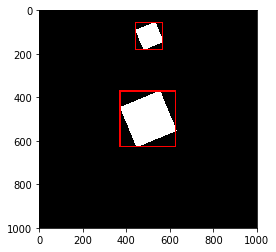

In [53]:
plt.imshow(draw_img)